In [1]:
#abrindo a sessao manualmente para funcinar no vcscod
from kedro.framework.session import KedroSession
session = KedroSession.create(project_path="../")
context = session.load_context()
catalog = context.catalog

                    INFO     Registering new custom resolver: 'km.random_name'                    ]8;id=403021;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=595448;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py#65\65]8;;\

                    WARNING  No 'mlflow.yml' config file found in environment. Default            ]8;id=544370;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py\mlflow_hook.py]8;;\:]8;id=571560;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro_mlflow\framework\hooks\mlflow_hook.py#78\78]8;;\
                             configuration will be used. Use ``kedro mlflow init`` command in CLI                  
                             to customize the configuration.                                                       

                    INFO     The 'tracking_uri' key in mlflow.yml is relative            ]8;id=262232;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py\kedro_mlflow_config.py]8;;\:]8;id=946909;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro_mlflow\config\kedro_mlflow_config.py#293\293]8;;\
                             ('server.mlflow_(tracking|registry)_uri = mlruns'). It is                             
                             converted to a valid uri:                                                             
                             'file:///C:/Users/Dell/Downloads/Engenharia_de_Machine_Lear                           
                             ning/python/kobe/mlruns'                                                              

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=586711;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=124395;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro_telemetry\plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

In [2]:
data_filtered = catalog.load("train_set")
session_id = catalog.load('params:session_id')

[04/05/25 09:21:02] INFO     Loading data from train_set (ParquetDataset)...                    ]8;id=428522;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=700972;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

                    INFO     Loading data from params:session_id (MemoryDataset)...             ]8;id=33251;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=561722;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

In [3]:
from pycaret.classification import *

In [4]:
exp = ClassificationExperiment()
#exp.setup(data=train, target='Survived', session_id=session_id, log_experiment='mlflow', experiment_name='titanic_pycaret')
exp.setup(data=data_filtered, target='shot_made_flag', session_id=session_id)

,Description,Value
0,Session id,12345
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [5]:
exp.get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x00000135CF4A1620>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method=('d...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x00000135CF4A1...,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x00000135CF4A1...,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


In [6]:
#criando uma seleçao de models
logr = exp.create_model('lr')

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>

In [8]:
exp.pull()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5660,0.5785,0.4696,0.5543,0.5085,0.1247,0.1261
1,0.5739,0.5774,0.5009,0.5608,0.5292,0.1424,0.1431
2,0.5519,0.5831,0.4751,0.5353,0.5034,0.0979,0.0984
3,0.5960,0.6117,0.4954,0.5925,0.5396,0.1847,0.1871
4,0.6021,0.6285,0.4880,0.6036,0.5397,0.1962,0.1996
5,0.5590,0.5989,0.4549,0.5465,0.4965,0.1100,0.1114
6,0.5651,0.5818,0.4678,0.5534,0.5070,0.1229,0.1243
7,0.5563,0.5806,0.4530,0.5430,0.4940,0.1047,0.1061
8,0.5783,0.5908,0.4577,0.5751,0.5097,0.1481,0.1511


In [17]:
import pandas 
from datetime import date

results_df = exp.pull()

model_name = "random_forest"  # personalize com o modelo real
today = date.today().isoformat()

#filename = f"cv_metrics_{model_name}_{today}.xlsx"

#filename = f"./cv_metrics_{model_name}_{today}.xlsx"
filename = f"../data/08_reporting/cv_metrics_{model_name}_{today}.xlsx"

results_df = exp.pull()
results_df.to_excel(filename)




# Salvar como arquivo Excel
#results_df.to_excel("resultados_experimento.xlsx", sheet_name="")
# Puxa o DataFrame com os resultados
#results_df = exp.pull()
# Salva em um arquivo CSV
#results_df.to_csv("resultados_experimento.csv")


In [8]:

exp.evaluate_model(logr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [9]:
tuned_model = exp.tune_model(logr, n_iter=100, optimize='AUC')

<IPython.core.display.HTML object>

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5572,0.5786,0.5120,0.5388,0.5250,0.1109,0.1110
1,0.5722,0.5774,0.5525,0.5525,0.5525,0.1427,0.1427
2,0.5546,0.5831,0.5433,0.5335,0.5383,0.1081,0.1081
3,0.6021,0.6117,0.5599,0.5880,0.5736,0.2011,0.2013
4,0.5933,0.6287,0.5359,0.5808,0.5575,0.1824,0.1829
5,0.5555,0.5987,0.5083,0.5370,0.5222,0.1072,0.1073
6,0.5651,0.5819,0.5359,0.5460,0.5409,0.1279,0.1279
7,0.5519,0.5808,0.5101,0.5327,0.5212,0.1005,0.1006
8,0.5748,0.5909,0.5202,0.5604,0.5396,0.1456,0.1460


<IPython.core.display.HTML object>

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


<IPython.core.display.HTML object>

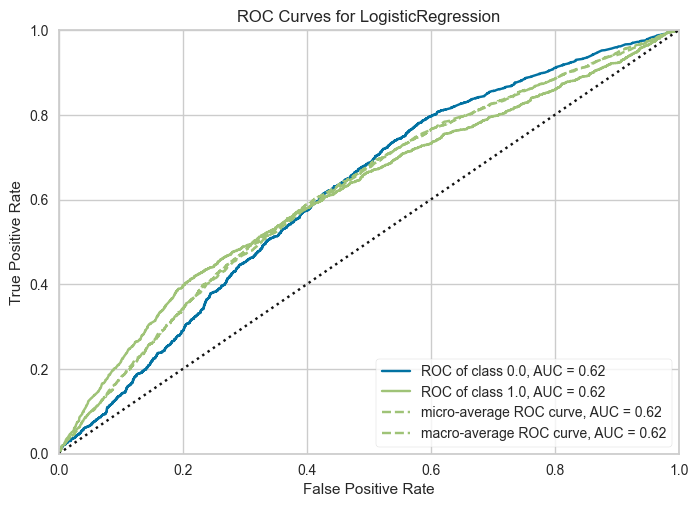

In [10]:
# Mostrar o gráfico
exp.plot_model(tuned_model, plot='auc')
